<a href="https://colab.research.google.com/github/shovalkooba/shoval1/blob/master/sifar10-good!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion matrix plot function

In [0]:
"""
================
Confusion matrix
================

Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using :ref:`grid_search`.

"""

#print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        normed_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        normed_cm = normed_cm*100;
        print("Normalized confusion matrix")
        print(normed_cm)
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(20,20))
    plt.imshow(normed_cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(normed_cm[i, j], fmt)+'%\n('+(format(cm[i, j], 'd'))+')',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.gcf().subplots_adjust(bottom=0.3)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Import Libraries

In [0]:
from keras.datasets import cifar10
from keras.models import Sequential, Model
import keras.layers as layers
from keras.utils import to_categorical
from keras import optimizers
from keras.models import model_from_json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np
from keras.layers import Conv2D,Flatten, Dense, Activation, MaxPooling2D, Dropout, BatchNormalization
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from numpy import argmax


Load Data

In [38]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Change labels to one-hot encoding\n",
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Print shapes
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


Define Parameters

In [0]:
num_of_clss =   10          # number of classes

lr =      1e-4               # learning rate 
beta_1 =      0.9           # beta 1 - for adam optimizer
beta_2 = 0.99        # beta 2 - for adam optimizer
epsilon =    1e-8            # epsilon - for adam optimizer
epochs =    50           # number of epochs 
bs =       16        # batch size
dp=0.5

Network layes

In [0]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(dp))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(dp))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(dp))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid',))
model.add(Dense(10, activation='softmax'))


Train the model

In [0]:
# define the optimizer and compile the model
adam = optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model, iterating on the data in batches of 64 samples
history = model.fit(x_train, y_train, validation_split=0.3, epochs=epochs, batch_size=bs)


Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 175s 5ms/step - loss: 2.3352 - acc: 0.1082 - val_loss: 2.3081 - val_acc: 0.0973
Epoch 2/50
35000/35000 [==============================] - 172s 5ms/step - loss: 2.3022 - acc: 0.1149 - val_loss: 2.3029 - val_acc: 0.1015
Epoch 3/50
35000/35000 [==============================] - 172s 5ms/step - loss: 2.2881 - acc: 0.1185 - val_loss: 2.2739 - val_acc: 0.1059
Epoch 4/50
35000/35000 [==============================] - 172s 5ms/step - loss: 2.1644 - acc: 0.1731 - val_loss: 2.0726 - val_acc: 0.2099
Epoch 5/50
35000/35000 [==============================] - 170s 5ms/step - loss: 2.0614 - acc: 0.2164 - val_loss: 1.9736 - val_acc: 0.2449
Epoch 6/50
35000/35000 [==============================] - 170s 5ms/step - loss: 1.9735 - acc: 0.2450 - val_loss: 1.9812 - val_acc: 0.2363
Epoch 7/50
35000/35000 [==============================] - 169s 5ms/step - loss: 1.9333 - acc: 0.2610 - val_loss: 1.8946 - 

Plot Train and Validation loss

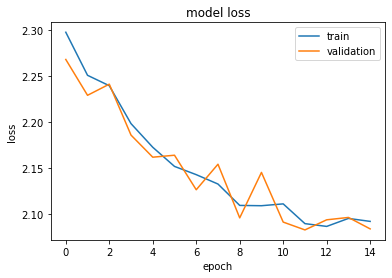

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show(); plt.close()


Model evaluation

In [43]:
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print('test loss:', test_loss)
print('test accuracy:', test_acc)
y_pred = model.predict(x_test)

10000/10000 [==============================] - 0s 46us/step
test loss: 2.081324666595459
test accuracy: 0.234


Predict on test set

Normalized confusion matrix
[[100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
[[1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0 

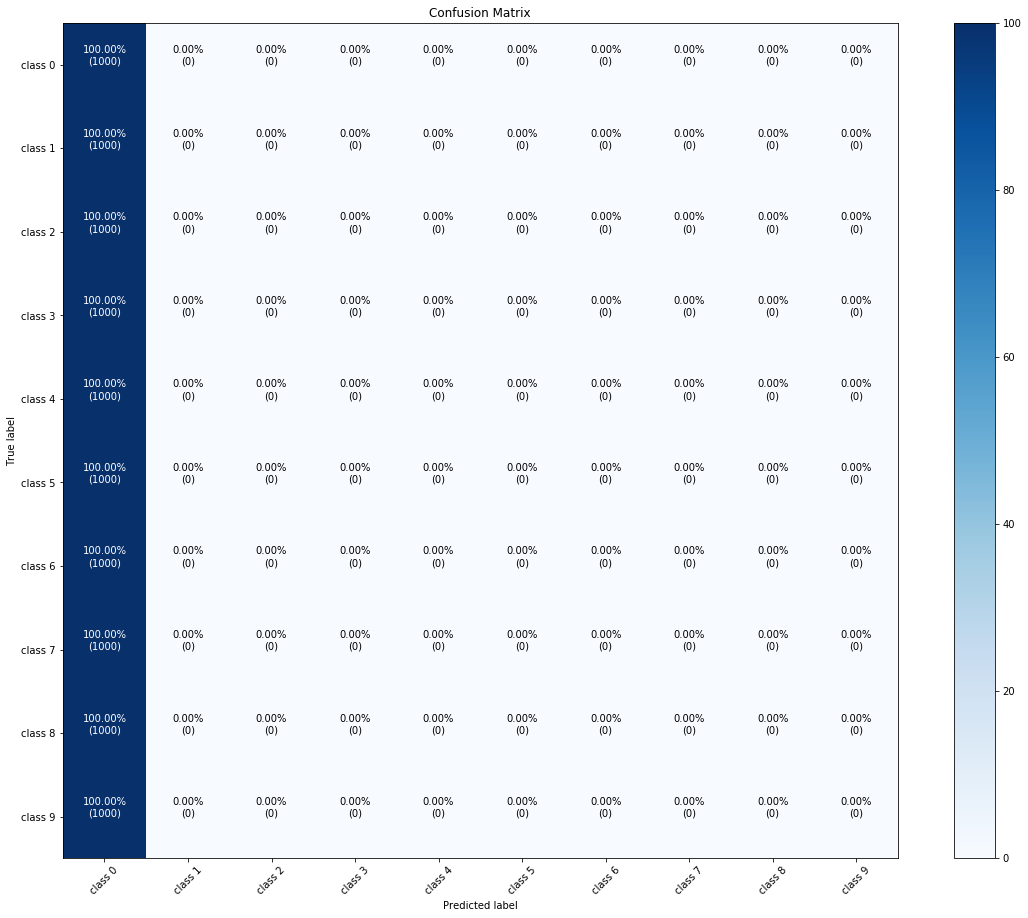

In [46]:
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(np.round(y_pred),axis=1))
labels = ['class ' + str(i) for i in range(num_of_clss)] 
plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)


Sunnerize

In [47]:
# Summerize the model arhiteture and parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


*binary* division for 0-else 

In [0]:
y_test_auc = [None] * len(y_test)
y_pred_auc = [None] * len(y_pred)

for i in range(0,len(y_test)):
  if(argmax(y_test[i])==0):
    y_test_auc[i]=0
  else:
   y_test_auc[i]=1


for i in range(0,len(y_pred)):
  if(argmax(y_pred[i])==0):
    y_pred_auc[i]=0
  else:
   y_pred_auc[i]=1


y_pred_auc= to_categorical(y_pred_auc)
y_test_auc= to_categorical(y_test_auc)



In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
# Compute ROC curve and ROC area for each class

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_auc[:, i], y_pred_auc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_auc.ravel(), y_pred_auc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plot roc curve

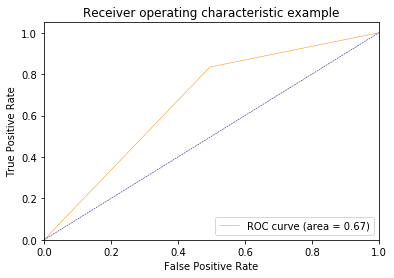

In [50]:
plt.figure()
plt.plot(fpr[i], tpr[i], color='darkorange',
         lw=0.5, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

calculate auc

In [0]:
print('auc score is:' roc_auc_score(y_test_auc, y_pred_auc...........................................................................................))

plot confusion matrix for binary classification

In [0]:
cm = confusion_matrix(np.argmax(y_test_auc,axis=1), np.argmax(np.round(y_pred_auc),axis=1))
labels = ['class ' + str(i) for i in range(2)] 
plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)